# Lineær Regresjon Versjon 1.0

Lineær regresjon basert på værmeldingen fra Arome. Benytte nærmeste aromedestinasjon som punktfor å forutse produksjonen i vindparken som helhet.

#### Importering av biblioteker

In [140]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Making plots look better
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

%config InlineBackend.figure_format = 'retina'

#### Innlasting av datasett

In [163]:
# TEK (1. Spetember til 18. Desember)
df_tek = pd.read_csv('vindkraft 181217 TEK met.csv',sep =';', low_memory = False)
    #df_tek.info()

# TEK (delayed 2 hours)
df_tek_delayed = pd.read_csv('vindkraft 181217 TEK met delayed.csv',sep =',', low_memory = False)
    #df_tek_delayed.info()

# AROME Værdata (1. Spetember til 18. Desember)
df_arome = pd.read_csv('vindkraft 181217 arome.csv',sep =';', low_memory = False)
    #df_arome.info()

#### Samling av datasett

In [142]:
df = pd.concat([df_arome['/arome_airtemp_6491_1087'],
                df_arome['/arome_airpress_6491_1087'], 
                df_arome['/arome_winddir_6491_1087'],
                df_arome['/arome_windvel_6491_1087'],
                df_tek['YVIK-YtreVikna1-Sum-produksjon']
               ], 
               axis = 1)

In [143]:
df.head(2)

,/arome_airtemp_6491_1087,/arome_airpress_6491_1087,/arome_winddir_6491_1087,/arome_windvel_6491_1087,YVIK-YtreVikna1-Sum-produksjon
0,9.33022,1004.8419,44.079459,1.831297,1.806583
1,9.78360,1005.0000,44.749222,1.723288,1.804100


#### Vaske sammenstilt datasett

In [144]:
cleaned_dataframe = df.dropna()

In [145]:
cleaned_dataframe.columns

Index(['/arome_airtemp_6491_1087', '/arome_airpress_6491_1087',
       '/arome_winddir_6491_1087', '/arome_windvel_6491_1087',
       'YVIK-YtreVikna1-Sum-produksjon'],
      dtype='object')

In [146]:
cleaned_dataframe.count()

/arome_airtemp_6491_1087          2533
/arome_airpress_6491_1087         2533
/arome_winddir_6491_1087          2533
/arome_windvel_6491_1087          2533
YVIK-YtreVikna1-Sum-produksjon    2533
dtype: int64

#### Grafiske visualiseringer av data som inngår in modellen

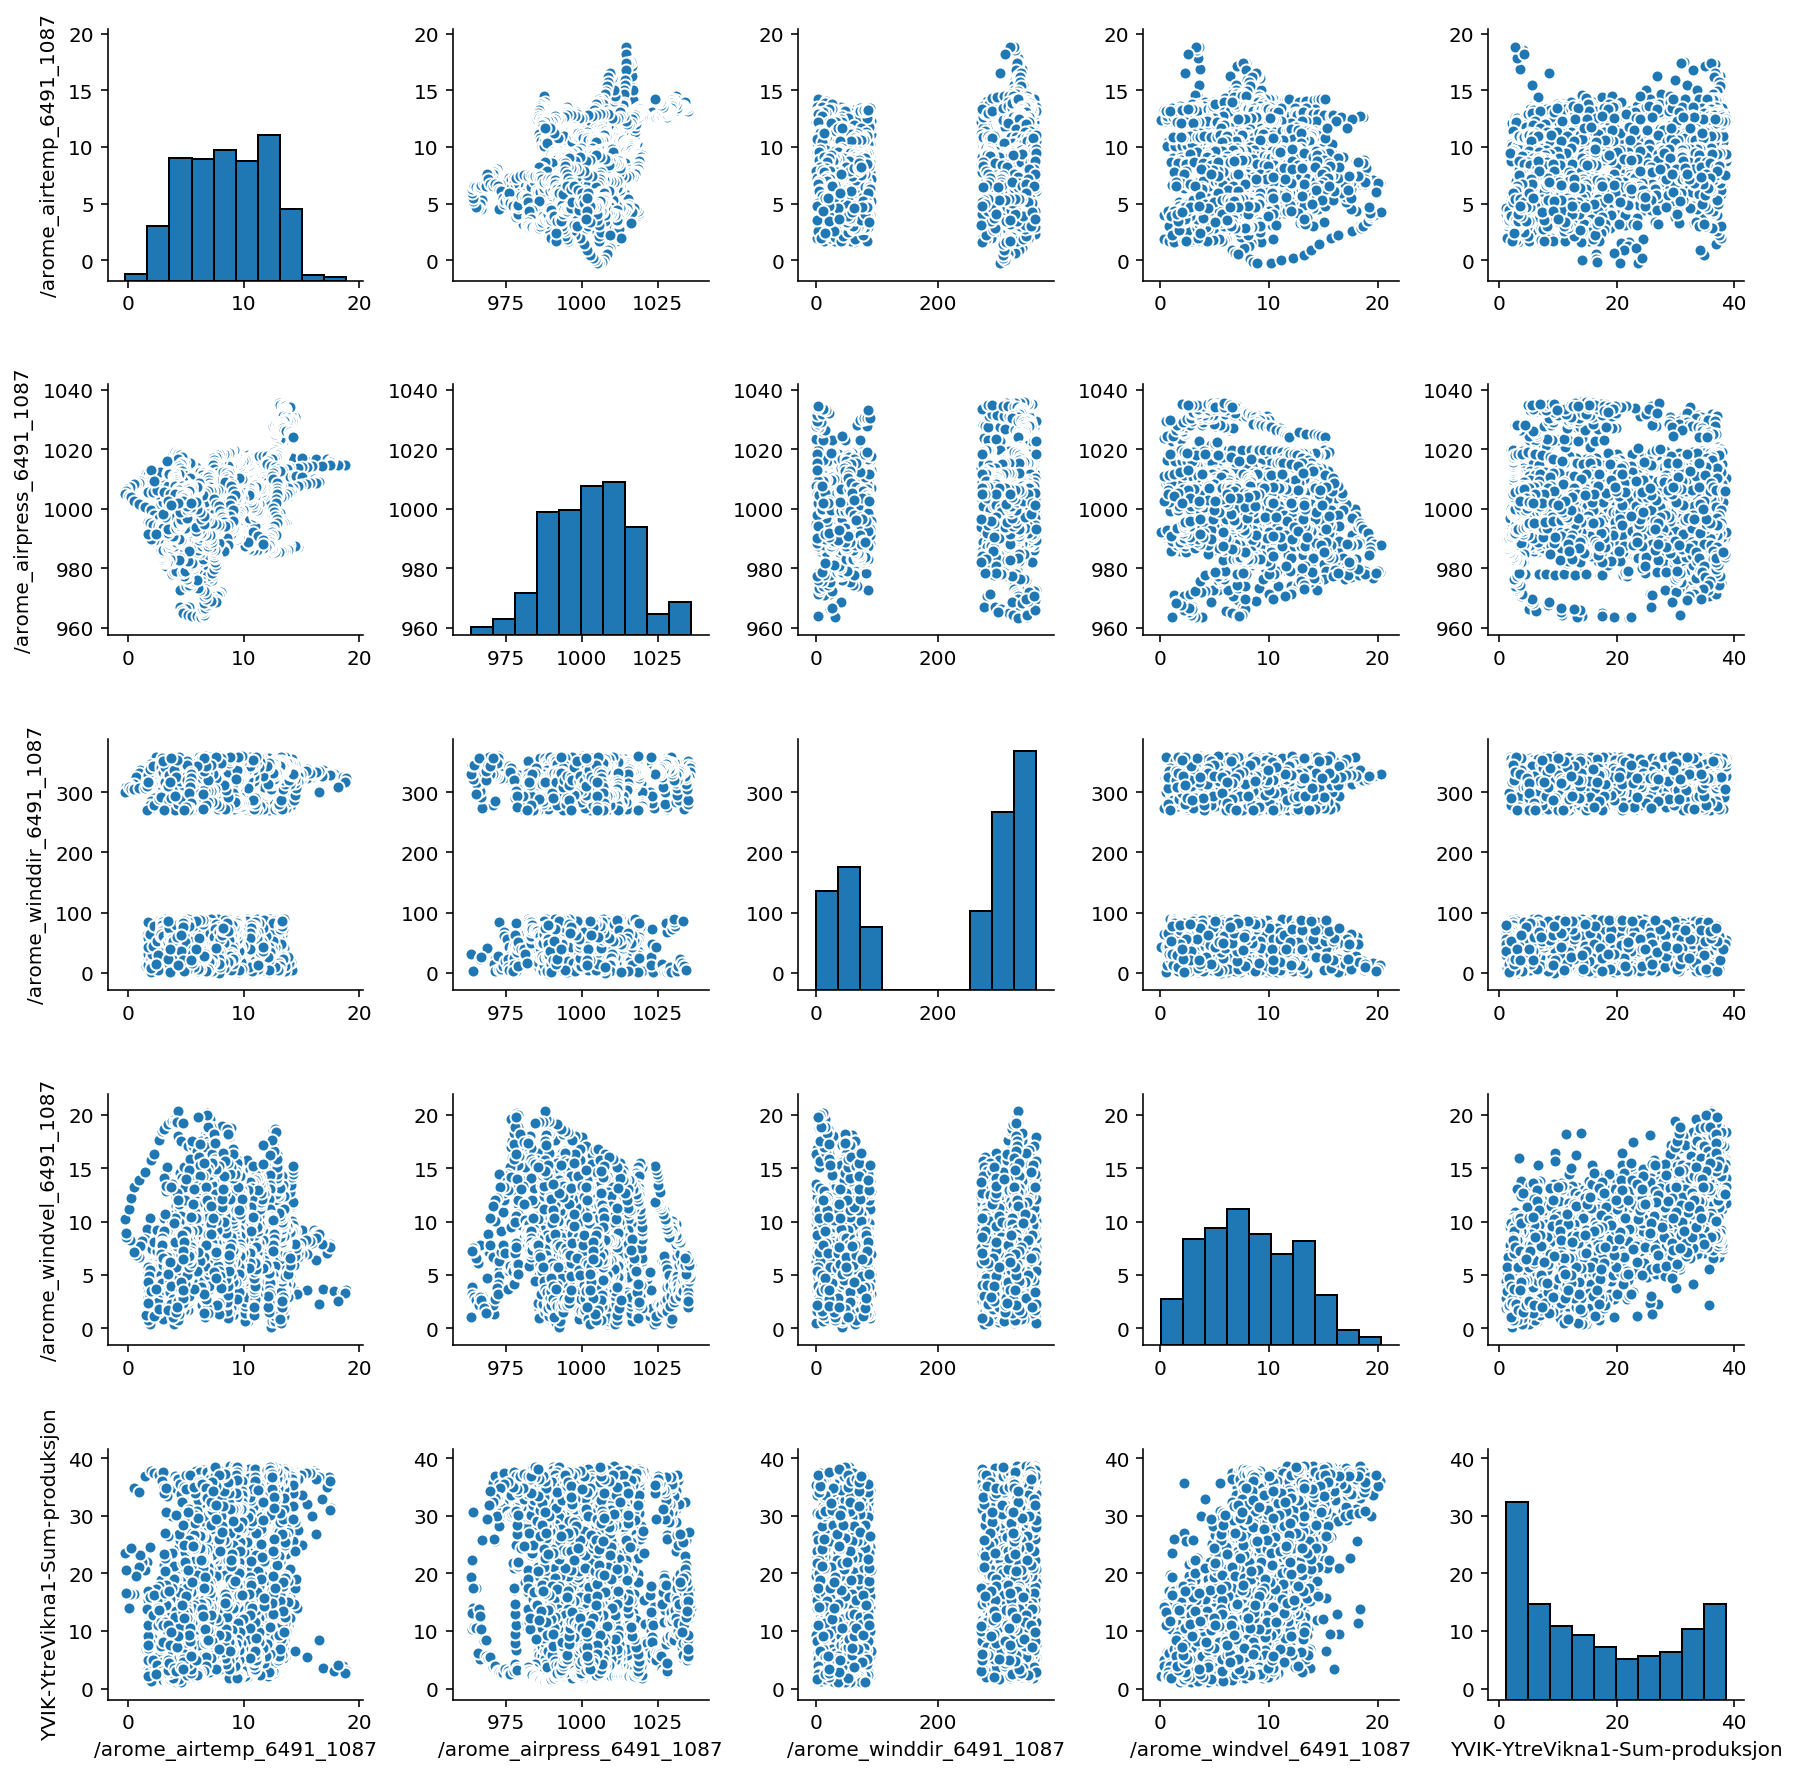

In [147]:
# Plott av alle variablene mot hverandre (diagonalen bli historgrammer)
sns.pairplot(cleaned_dataframe)

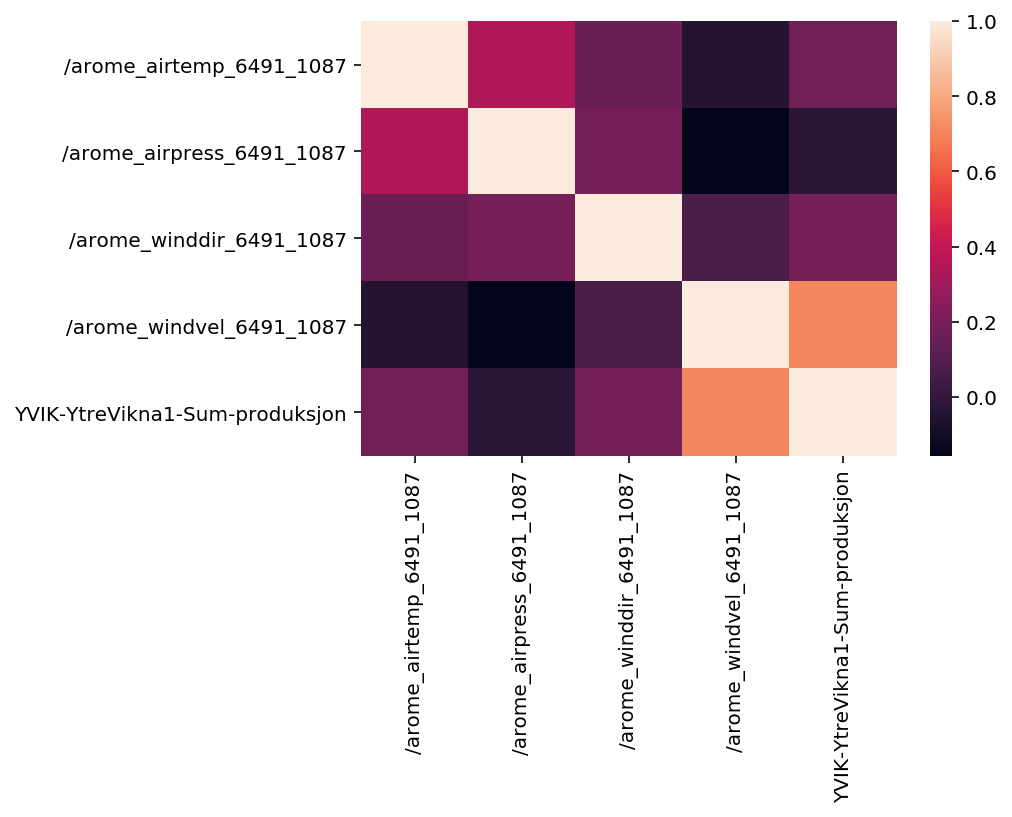

In [148]:
# Ser etter korrelasjoner mellom variablene
sns.heatmap(cleaned_dataframe.corr())

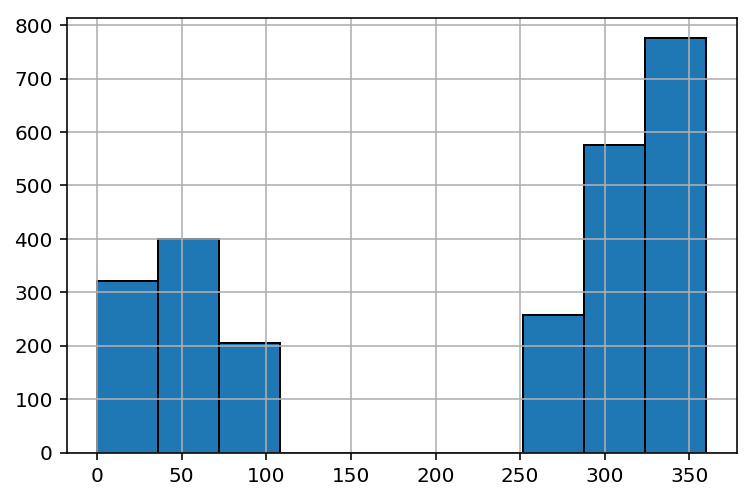

In [149]:
# Noe veldig rart med kollonen for vindrettning

cleaned_dataframe['/arome_winddir_6491_1087'].hist()

#### Dele datasett i en X og et Y sett

In [150]:
x = cleaned_dataframe[['/arome_airtemp_6491_1087', '/arome_airpress_6491_1087','/arome_winddir_6491_1087', '/arome_windvel_6491_1087']]
y = cleaned_dataframe['YVIK-YtreVikna1-Sum-produksjon']

#### Train Test Split

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#### Lage og trene modellen

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
lm = LinearRegression()

In [155]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Undersøke koefsientene i modellen

In [156]:
# Prine ut coefisienter
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

# Ser at vindhastighetene har den klart sterkeste påvirkningen på modellen. 

,Coefficient
/arome_airtemp_6491_1087,0.714694
/arome_airpress_6491_1087,-0.005680
/arome_winddir_6491_1087,0.009872
/arome_windvel_6491_1087,2.069893


#### Predikere de utelatte verdiene (test dataen)

In [157]:
predictions = lm.predict(X_test)

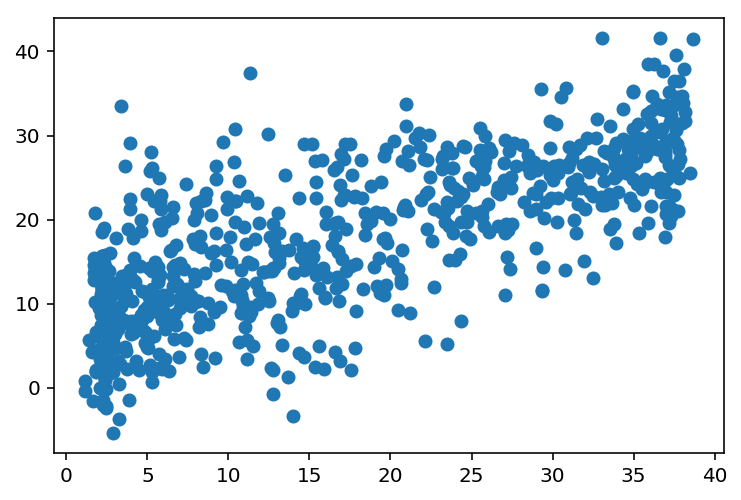

In [158]:
# Burde følge en rett linje

plt.scatter(y_test,predictions)

Text(0.5,1,'Visualisering av nøyaktigheten av lineær regresjons modell')

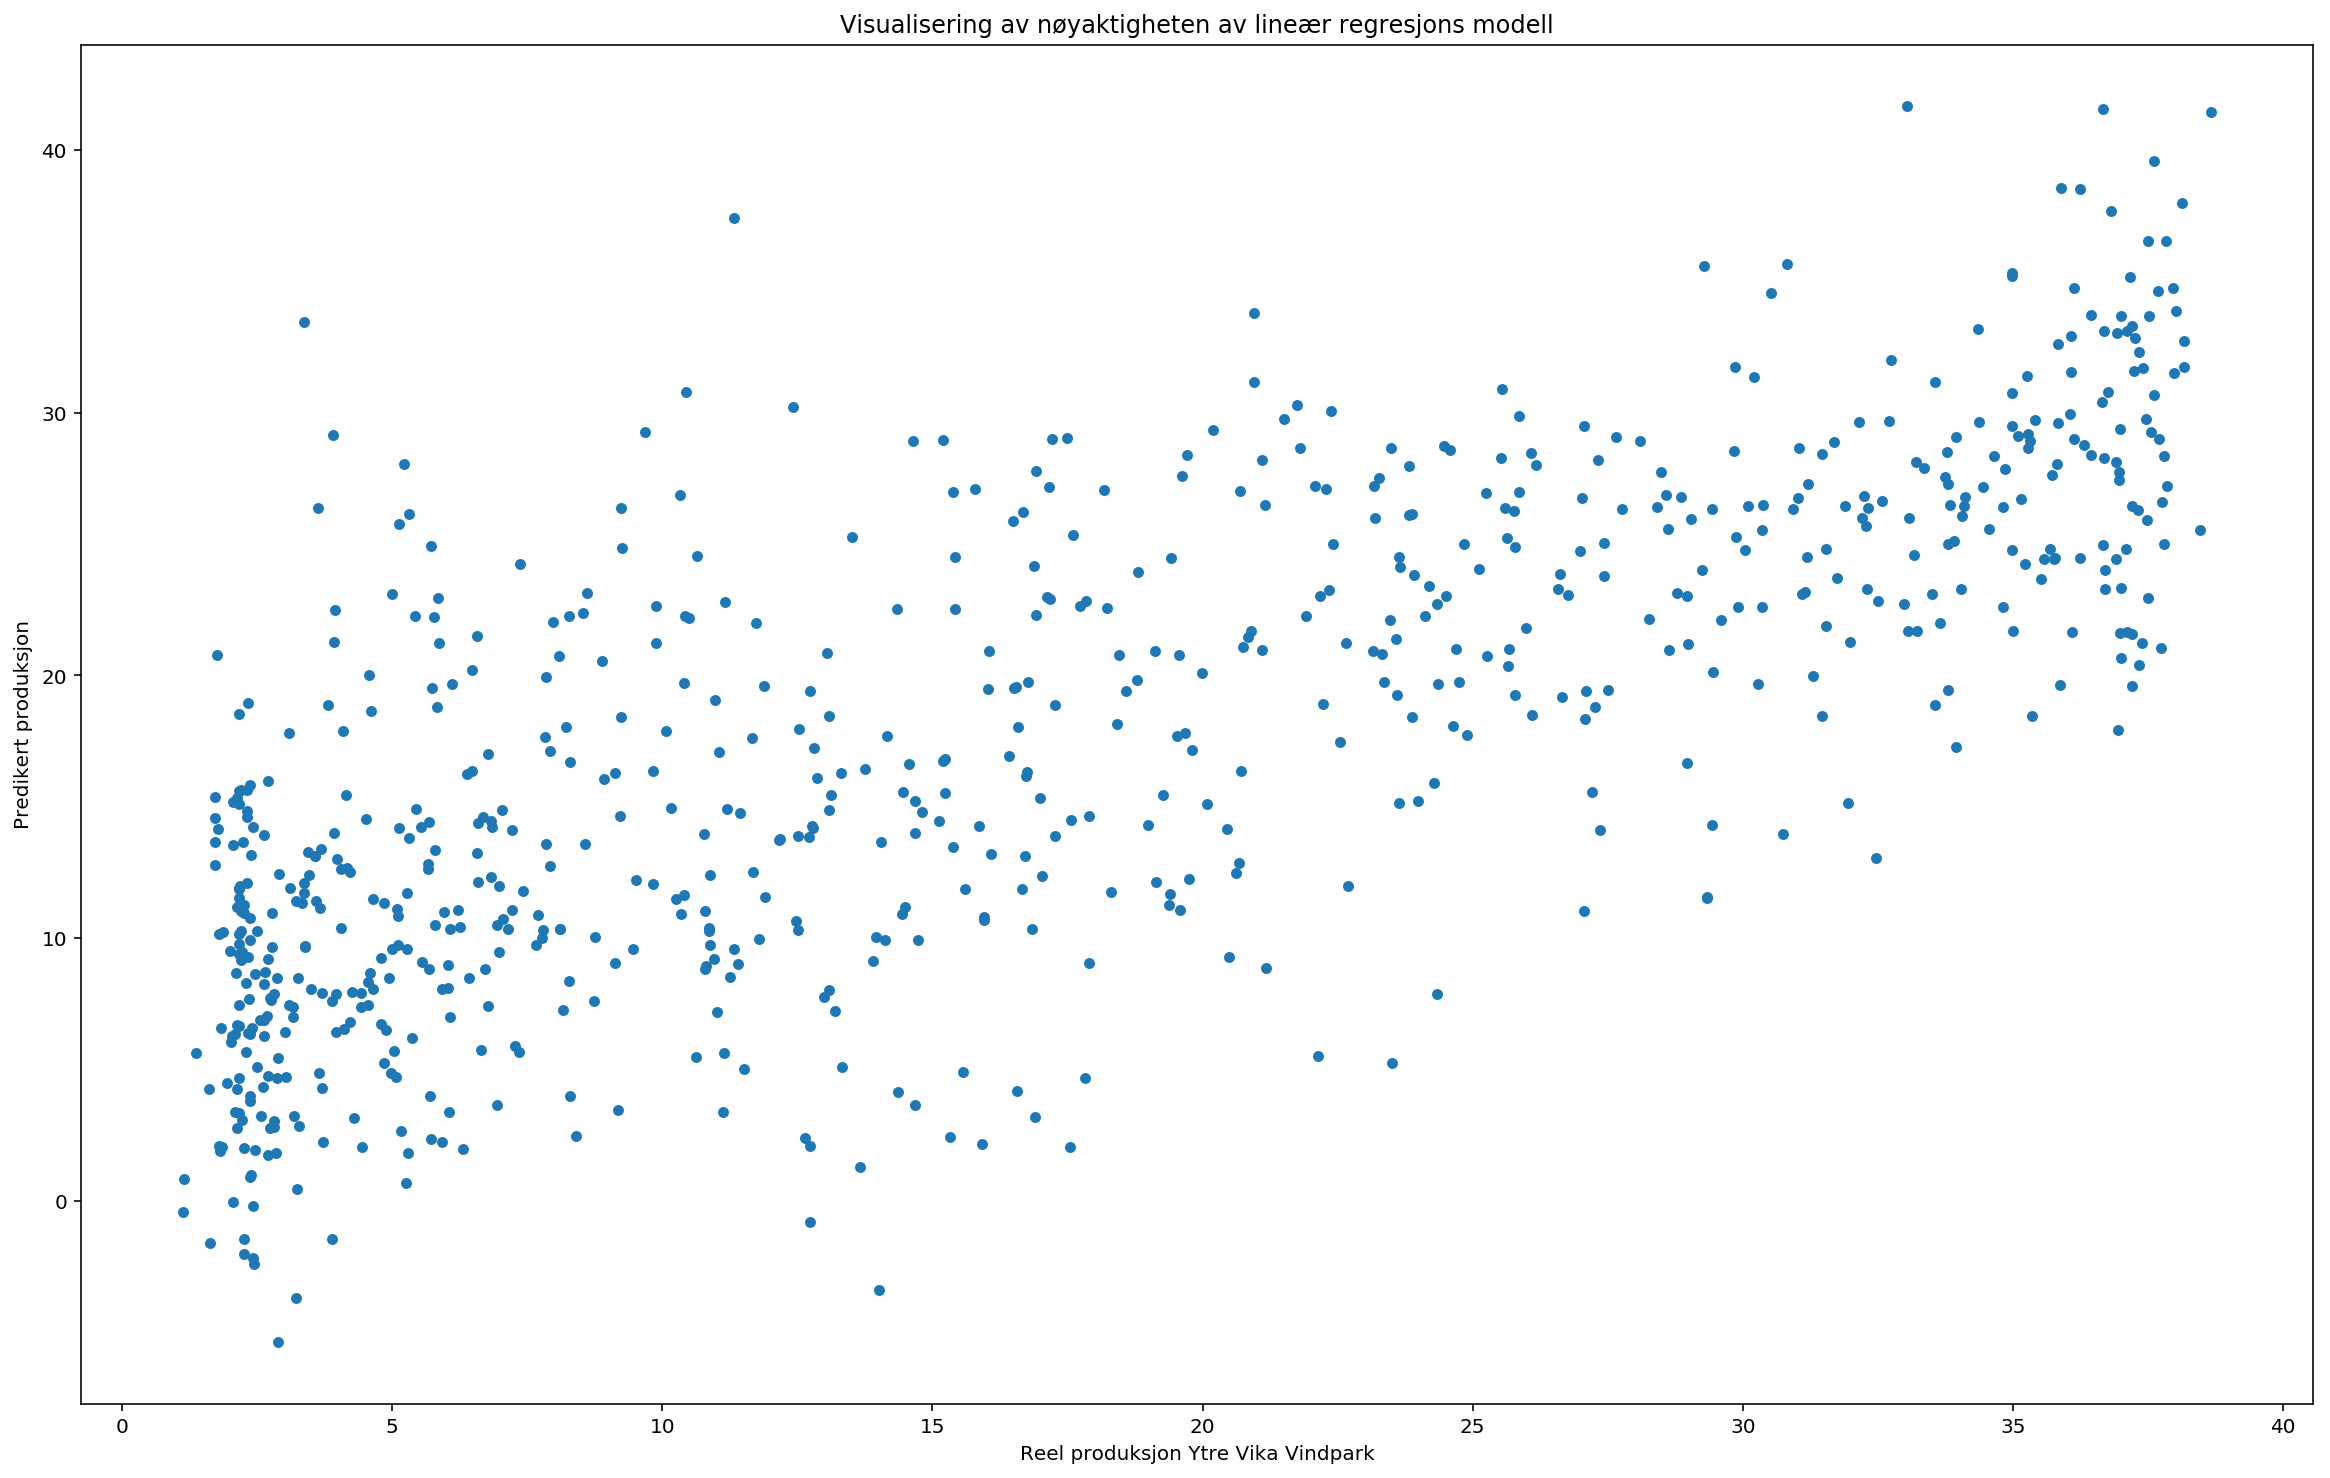

In [159]:
# Bedre figur:
plt.figure(figsize=(20, 12.5))
plt.scatter(y_test,predictions, s = 20)

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av lineær regresjons modell')

In [160]:
# Ser ut til å gi et halvgreit resultat. Betydelig dårligere enn dagens modell.

#### Kartlegge hvordan modellene gjør det!

In [161]:
from sklearn import metrics

In [162]:
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 			 6.51895024407
Mean Squared Error: 			 66.1592717471
Root Mean Squared Error: 		 8.13383499631


## Konklusjon

De ulineære sammenhengene gjør at lineær regresjon er svært uegnet til predikere vindproduksjonen.